In [1]:
import pycaret
pycaret.__version__

'3.2.0'

In [8]:
import pandas as pd

In [11]:
winedata = pd.read_csv('data\wine-clustering.csv') #csv path
winedata.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Seup experiment

In [12]:
from pycaret.clustering import *
clust1 = setup(winedata, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


Access all the variables created by the setup function using get_config()

In [24]:
get_config()

{'USI',
 'X',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables'}

Example of how to access and change config variables

In [26]:
# access seed
print("The current seed is: {}".format(get_config('seed')))

# change seed
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


#### Below method uses OOP API versus the Functional API above. Both methods should yield same results

In [13]:
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [14]:
# Check type of emperiment. Notice this type is OOP

type(exp)

pycaret.clustering.oop.ClusteringExperiment

In [ ]:
exp.setup(winedata, session_id = 123)

#### Continue with Functinal API

# Logging
Logging can be enabled during experiment setup. The default logger is mlflow. Other loggers shown below
- mlflow
- wandb
- comet_ml
- dagshub

In [ ]:
# from pycaret.clustering import *
# s = setup(winedata, log_experiment='mlflow', experiment_name='wine_project')

In [ ]:
# train kmeans
# kmeans = create_model('kmeans')


In [ ]:
# start mlflow server on localhost:5000
# !mlflow ui

# Create model

In [15]:
# Train K-Means Clustering model
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5620,708.0867,0.5443,0,0,0


Below is a list of parameters that can accessed to train the model.
- num_clusters
- ground_truth
- fit_kwargs
- experiment_custom_tags
- engine

In the next code cell we can train a model with 10 clusters.

In [ ]:
# train kmeans with 10 clusters
#create_model('kmeans', num_clusters = 10)

In [16]:
# List clustering models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [17]:
# Train Agglomerative Clustering model

hclust = create_model('hclust')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5607,670.6260,0.5536,0,0,0


# Assign model
Assign cluster labels to trained data

In [18]:
kmeans_c = assign_model(kmeans)
kmeans_c


# Notice last column 'Cluster' containes the cluster label for each data row.

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.600000,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Cluster 3
1,13.20,1.78,2.14,11.200000,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Cluster 3
2,13.16,2.36,2.67,18.600000,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Cluster 0
3,14.37,1.95,2.50,16.799999,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Cluster 0
4,13.24,2.59,2.87,21.000000,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.500000,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,Cluster 2
174,13.40,3.91,2.48,23.000000,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,Cluster 2
175,13.27,4.28,2.26,20.000000,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,Cluster 2
176,13.17,2.59,2.37,20.000000,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,Cluster 2


# Analyze

In [19]:
# PCA cluster plot
plot_model(kmeans, plot = 'cluster')

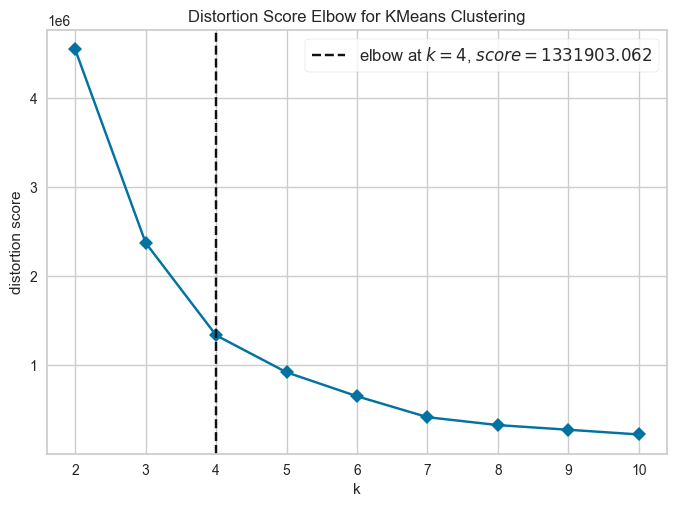

In [20]:
# elbow
plot_model(kmeans, plot = 'elbow')

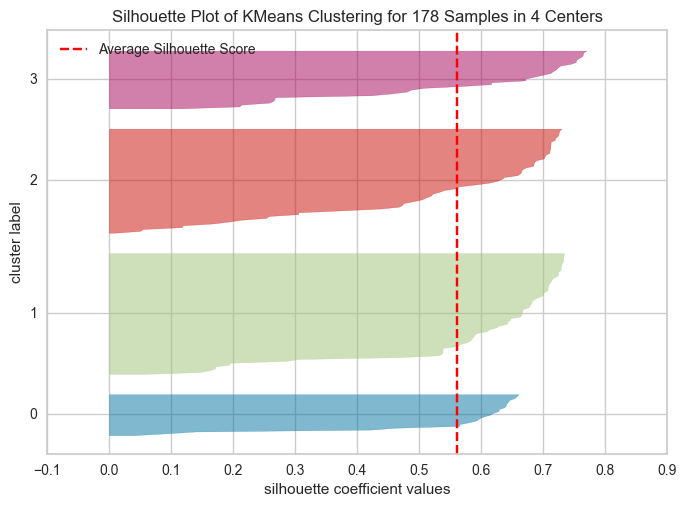

In [21]:
# silhouette
plot_model(kmeans, plot = 'silhouette')

In [22]:
# alternative to plot_model function
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Predict

In [23]:
kmeans_pred = predict_model(kmeans, data=winedata)
kmeans_pred

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,Cluster 3
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,Cluster 3
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,Cluster 0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,Cluster 0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,Cluster 2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,Cluster 2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,Cluster 2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,Cluster 2


# Example of setting up experiment with different configurations.

In [31]:
# Setup experiment with normalization and 'minmax' method.
s = setup(winedata, session_id = 123, normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Original data shape,"(178, 13)"
2,Transformed data shape,"(178, 13)"
3,Numeric features,13
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,minmax


<AxesSubplot: >

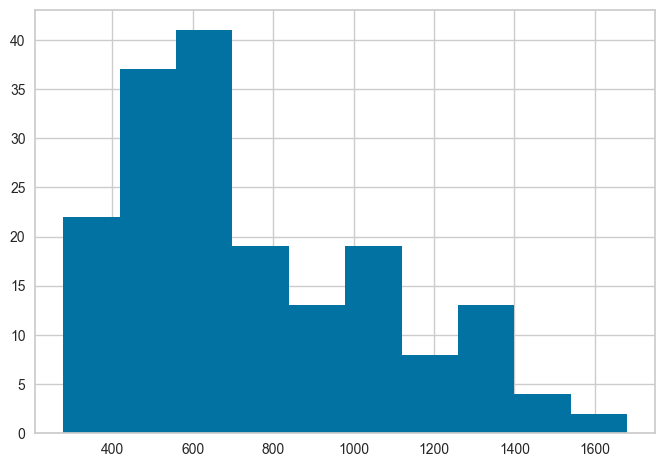

In [34]:
# Original values of 'Proline'. Notice values are on a higher scale from about 350 to 1650.
get_config('X_train')['Proline'].hist()

<AxesSubplot: >

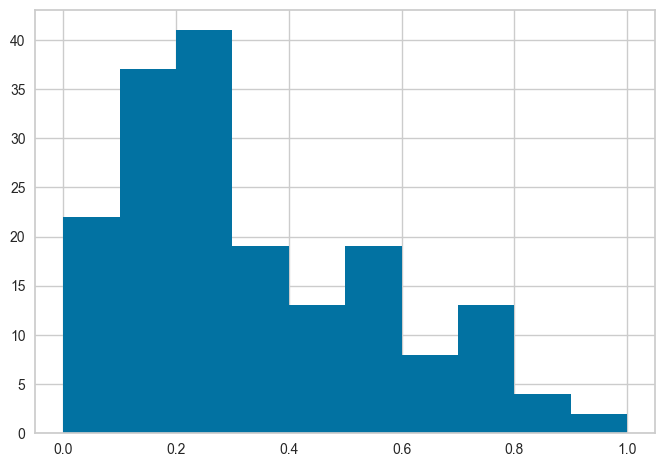

In [32]:
# Values of 'Proline' after they have been transformed. Notice values are now between 0 and 1.
get_config('X_train_transformed')['Proline'].hist()